### Pertemuan 10 Tensorflow - Augmentasi 

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator
import os


In [63]:
source_path_train = r'./../Materi-Praktikum-KB/dataset/Villains/train'
source_path_val = r'./../Materi-Praktikum-KB/dataset/Villains/validation'

In [64]:
train_datagen = ImageDataGenerator(
    #dsini untuk menentukan augmentasi apa aja yang digunakan
    rescale=1./255,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    rotation_range=30,
    validation_split =.05
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [65]:
train_generator = train_datagen.flow_from_directory(
    source_path_train,
    target_size=(150,300),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    source_path_val,
    target_size=(150,300),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [66]:
image, label  = train_generator.next()

In [67]:
len(image)

8

In [68]:
label

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## melihat gambar dalam bentuk array
### Visualisasi Gambar

In [50]:
labels_name = ['Darth Vader', 'Green Goblin', 'Joker', 'Thanos', 'Venom']

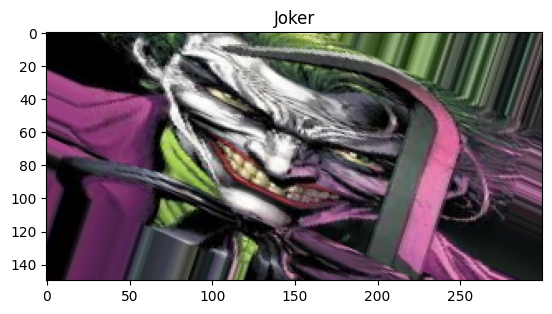

In [69]:
# buat PA
# Harus sesuai dengan title dari labelnya
# dan gambarnya juga
plt.title(labels_name[tf.argmax(label[0])])
plt.imshow(image[0])

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,4), activation='relu', input_shape=(150,300, 3)),
    tf.keras.layers.MaxPool2D(1,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels_name), activation='softmax')
])

In [71]:
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [72]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data= val_generator
)

Epoch 1/25
10/10 [==============================] - 6s 589ms/step - loss: 24.3211 - accuracy: 0.1867 - val_loss: 5.8711 - val_accuracy: 0.3600
Epoch 2/25
10/10 [==============================] - 6s 550ms/step - loss: 3.4433 - accuracy: 0.4000 - val_loss: 2.0402 - val_accuracy: 0.3600
Epoch 3/25
10/10 [==============================] - 5s 540ms/step - loss: 2.9120 - accuracy: 0.4267 - val_loss: 1.5825 - val_accuracy: 0.3600
Epoch 4/25
10/10 [==============================] - 6s 549ms/step - loss: 1.2278 - accuracy: 0.5333 - val_loss: 1.6199 - val_accuracy: 0.4400
Epoch 5/25
10/10 [==============================] - 5s 541ms/step - loss: 1.1212 - accuracy: 0.5733 - val_loss: 1.5826 - val_accuracy: 0.3600
Epoch 6/25
10/10 [==============================] - 5s 541ms/step - loss: 1.0705 - accuracy: 0.6133 - val_loss: 1.5555 - val_accuracy: 0.4000
Epoch 7/25
10/10 [==============================] - 6s 547ms/step - loss: 0.7608 - accuracy: 0.7333 - val_loss: 2.1593 - val_accuracy: 0.4400
Epoch

In [74]:
y_acc = history.history['accuracy']
y_val_acc = history.history['val_accuracy']

y_loss = history.history['loss']
y_val_loss = history.history['val_loss']
x_ = range(len(y_acc))

Text(0.5, 1.0, 'Loss')

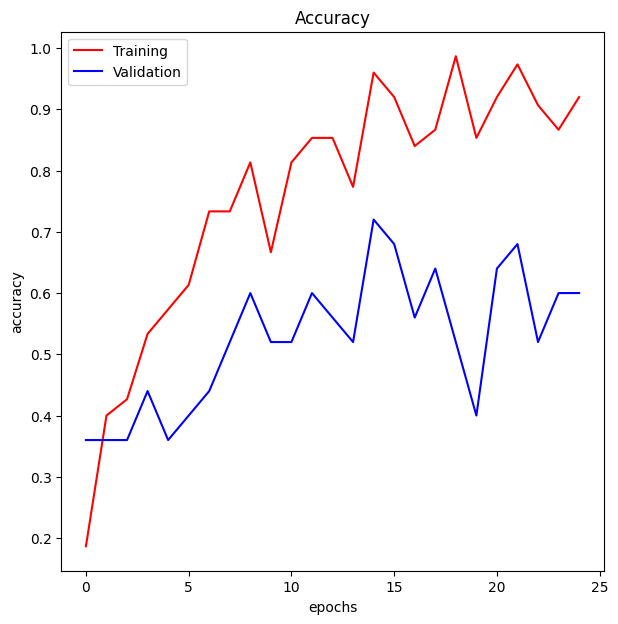

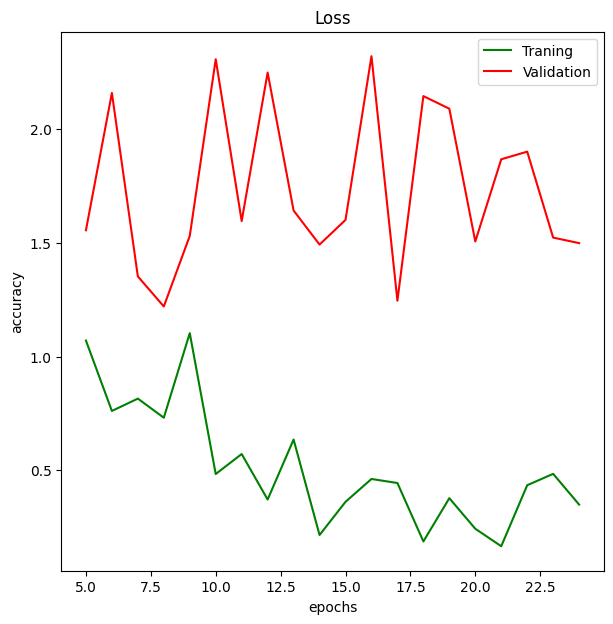

In [78]:
plt.figure(1, figsize=(7,7))
plt.plot(x_, y_acc, c='r', label='Training')
plt.plot(x_, y_val_acc, c='b', label='Validation')
plt.legend()
plt.xlabel('epochs'),
plt.ylabel('accuracy')
plt.title('Accuracy')

plt.figure(2, figsize=(7,7))
plt.plot(x_[5:], y_loss[5:], c='g', label='Traning')
plt.plot(x_[5:], y_val_loss[5:], c='r', label='Validation')
plt.legend()
plt.xlabel('epochs'),
plt.ylabel('accuracy')
plt.title('Loss')